# Neural Network (Pytorch)

<p>Deep learning networks tend to be massive with dozens or hundreds of layers, that's where the term "deep" comes from. You can build one of these deep networks using only weight matrices as we did in the previous notebook, but in general it's very cumbersome and difficult to implement. PyTorch has a nice module nn that provides a nice way to efficiently build large neural networks.</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# MNIST dataset

In [2]:
import torch
from torchvision import *

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])

train = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

In [3]:
trainloader.batch_size

64

In [4]:
trainloader.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /home/mayank/.pytorch/MNIST_data/
    Split: Train

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


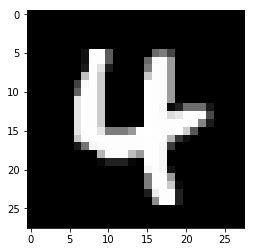

In [6]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [7]:
def activation(x):
    return 1/(1+torch.exp(-x))

inputs = images.view(images.shape[0],-1)

w1 = torch.randn((inputs.shape[1], 256))
b1 = torch.randn((256))

w2 = torch.randn((256, 10))
b2 = torch.randn((10))

a1 = activation(torch.mm(inputs, w1)+b1)
out = torch.mm(a1, w2) + b2

In [8]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [9]:
probabilities = softmax(out)

In [15]:
probabilities.argmax(dim=-1)

tensor([3, 3, 3, 5, 3, 7, 5, 7, 3, 3, 7, 7, 3, 3, 3, 3, 3, 3, 7, 3, 3, 7, 3, 3,
        3, 3, 5, 3, 3, 3, 7, 7, 3, 3, 3, 3, 3, 4, 7, 3, 3, 3, 3, 3, 3, 5, 3, 7,
        3, 3, 7, 3, 3, 0, 3, 3, 3, 7, 3, 3, 3, 1, 3, 7])

# Neural Network in Pytorch

In [16]:
from torch import nn

In [17]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [18]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [21]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [22]:
model2 = Network()
model2

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

<b>Exercise</b>: Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the nn.ReLU module or F.relu function.

In [23]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden1 = nn.Linear(784,128)
        self.hidden2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [24]:
model3 = NeuralNet()
model3

NeuralNet(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [26]:
# Weights and biases are automatically initialized for you
print(model3.hidden2.weight)
print(model3.hidden2.bias)

Parameter containing:
tensor([[ 0.0637,  0.0404,  0.0478,  ...,  0.0195,  0.0184,  0.0166],
        [-0.0424, -0.0114,  0.0447,  ..., -0.0365, -0.0856, -0.0095],
        [-0.0208, -0.0678,  0.0364,  ..., -0.0483,  0.0494,  0.0160],
        ...,
        [ 0.0335,  0.0745, -0.0684,  ...,  0.0371,  0.0707, -0.0407],
        [ 0.0707,  0.0544,  0.0135,  ...,  0.0102, -0.0845,  0.0385],
        [-0.0476, -0.0399, -0.0325,  ..., -0.0497,  0.0622,  0.0327]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0561, -0.0676, -0.0852,  0.0378,  0.0770, -0.0277,  0.0415,  0.0214,
        -0.0399,  0.0043,  0.0042,  0.0395,  0.0174,  0.0339, -0.0830,  0.0297,
         0.0705,  0.0409, -0.0436,  0.0061, -0.0539,  0.0771,  0.0176,  0.0300,
        -0.0281,  0.0726,  0.0493, -0.0188,  0.0579,  0.0288, -0.0227, -0.0084,
        -0.0625,  0.0820, -0.0653, -0.0563,  0.0450, -0.0392, -0.0299, -0.0590,
        -0.0100, -0.0313,  0.0288, -0.0731, -0.0610,  0.0064,  0.0481,  0.0512,
        -0.0765

In [27]:
# set biases to zero
model3.hidden1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
model3.hidden1.bias.data.normal_(std=0.01)

tensor([-1.7043e-03,  6.9587e-03, -5.4615e-03, -1.2946e-03, -1.9161e-03,
        -5.8330e-03,  1.7676e-04,  4.1796e-03,  5.8040e-03, -7.7148e-03,
         5.6522e-03, -1.0591e-02, -1.3258e-02, -3.6532e-03,  6.3247e-03,
        -1.8796e-03, -9.9431e-03,  3.6220e-03, -3.1607e-03,  4.1125e-03,
         3.2140e-04,  5.6042e-03, -1.1273e-02,  8.3328e-03,  1.9059e-02,
         4.5373e-03, -7.4468e-03, -1.9635e-02, -6.9324e-03, -4.9179e-03,
        -5.7151e-03,  1.4498e-03, -3.6122e-04,  4.2753e-03, -6.9385e-03,
        -6.9651e-03,  1.3953e-02, -1.0281e-02, -8.4345e-03, -7.7881e-03,
        -7.2714e-03,  1.5049e-02,  7.9758e-04, -8.3875e-03, -6.9600e-04,
        -1.4689e-02, -1.3753e-02,  3.5790e-03,  9.5741e-03,  5.9591e-05,
         6.8126e-03, -7.6803e-03,  6.4860e-03,  1.1544e-02,  2.5154e-03,
        -1.3675e-02, -1.5040e-02,  9.1557e-03,  1.1999e-02, -1.9081e-02,
        -2.4007e-03, -4.0624e-03, -9.1129e-03,  3.5178e-03,  4.1759e-03,
         7.5676e-03,  2.0113e-02,  6.2374e-04, -3.2

# Forward Pass

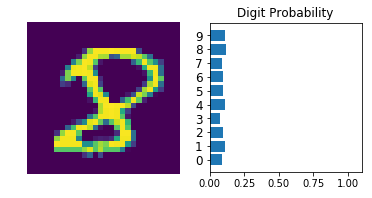

In [72]:
import helper2
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 1
ps = model3.forward(images[img_idx,:])

img = images[img_idx]
helper2.view_classify(img.view(1, 28, 28), ps)

# nn.Sequential

In [73]:
input_size = 786
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[1],output_size),
                     nn.Softmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=786, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


In [74]:
print(model[0])
model[0].weight

Linear(in_features=786, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0222, -0.0091, -0.0320,  ...,  0.0268, -0.0215, -0.0012],
        [-0.0265,  0.0110,  0.0115,  ..., -0.0251,  0.0268, -0.0261],
        [ 0.0333,  0.0282, -0.0131,  ..., -0.0296, -0.0054,  0.0329],
        ...,
        [ 0.0257,  0.0340, -0.0318,  ...,  0.0190,  0.0356,  0.0253],
        [-0.0246,  0.0195, -0.0278,  ..., -0.0105,  0.0127, -0.0355],
        [-0.0200, -0.0135,  0.0171,  ...,  0.0148, -0.0145, -0.0060]],
       requires_grad=True)

In [77]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_sizes[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
    ('relu2', nn.ReLU()),
    ('fc3', nn.Linear(hidden_sizes[1], output_size)),
    ('softmax', nn.Softmax(dim=1))
]))

print(model)

Sequential(
  (fc1): Linear(in_features=786, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)


In [78]:
print(model[0])
print(model.fc1)

Linear(in_features=786, out_features=128, bias=True)
Linear(in_features=786, out_features=128, bias=True)
